# KNN CLassification for 16 Features- Shermaine


# Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Read File/ Data Exploration

In [2]:
df= pd.read_csv("C:/Users/Shermaine/Documents/Python ML II (Cher Wah)/caknn/fs/NewFeatures_16_Sher3.csv")

In [3]:
df.head(5)

,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,M,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,M,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,M,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,M,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   texture_mean             569 non-null    float64
 2   area_mean                569 non-null    float64
 3   smoothness_mean          569 non-null    float64
 4   concavity_mean           569 non-null    float64
 5   symmetry_mean            569 non-null    float64
 6   fractal_dimension_mean   569 non-null    float64
 7   texture_se               569 non-null    float64
 8   area_se                  569 non-null    float64
 9   smoothness_se            569 non-null    float64
 10  concavity_se             569 non-null    float64
 11  symmetry_se              569 non-null    float64
 12  fractal_dimension_se     569 non-null    float64
 13  smoothness_worst         569 non-null    float64
 14  concavity_worst          5

In [5]:
df.head()

,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,M,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,M,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,M,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,M,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


# Encoding
The second feature ‘diagnosis’ is binary and categorical with the values ‘B’ for Benign and ‘M’ for Malignant. 
The variable will be the label for supervised learning problem and the values will be encoded to 0 and 1 respectively for the training. 

In [6]:
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})

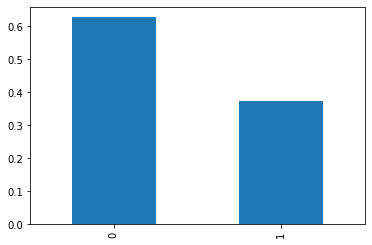

In [7]:
df["diagnosis"].value_counts(normalize=True).plot(kind='bar')
plt.show()

# Train_Test_Split= 70/30

In [8]:
X= df.drop("diagnosis",axis=1)
y= df["diagnosis"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

## KNN Classifier


# Since KNN is a distance based Algorithm- we need to do standardization of values

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3) 

start_time=time.time()

clf.fit(X_train, y_train)

end_time=time.time()

print("---%s seconds ---" % (end_time - start_time))

print(clf.score(X_test, y_test))

---0.001993417739868164 seconds ---
0.9649122807017544


# Import Metrics and Matrix Libraries

In [12]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

In [13]:
# Validating the train on the model
y_train_pred =clf.predict(X_train)
y_train_prob =clf.predict_proba(X_train)[:,1]

print("Accuracy Score of train", accuracy_score(y_train,y_train_pred))
print("AUC of the train ", roc_auc_score(y_train,y_train_prob))
print(" confusion matrix \n" , confusion_matrix(y_train,y_train_pred))

Accuracy Score of train 0.9773869346733668
AUC of the train  0.9973585617638339
 confusion matrix 
 [[247   2]
 [  7 142]]


In [14]:
# Model on Test data 
y_test_pred =clf.predict(X_test)
y_test_prob =clf.predict_proba(X_test)[:,1]

print("Accuracy Score of test", accuracy_score(y_test,y_test_pred))
print("AUC of the test ", roc_auc_score(y_test,y_test_prob))
print(" confusion matrix \n" , confusion_matrix(y_test,y_test_pred))

Accuracy Score of test 0.9649122807017544
AUC of the test  0.9894179894179895
 confusion matrix 
 [[105   3]
 [  3  60]]


In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred)) 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



# Classification Rate/Accuracy(Manual Calculation to cross-check against classification_report):

TN= 108, FP=0,
FN= 6, TP=57

Accuracy = (TP + TN) / (TP + TN + FP + FN)

Recall: Recall gives us an idea about when it’s actually yes, how often does it predict yes.
Recall = TP / (TP + FN) = 100 / (100 + 5) = 0.95

Precision: Precsion tells us about when it predicts yes, how often is it correct.
Precision = TP / (TP + FP)=100/ (100+10) = 0.91

F-measure:
Fmeasure = (2 * Recall * Precision) / (Recall + Presision) = (2 * 0.95 * 0.91) / (0.91 + 0.95) = 0.92

In [16]:
#Shermaine- cross verified with data from classification report in In[29]
TN= 108
FP=0
FN= 6
TP=57
TOTAL= 171 #n

Accuracy = (TP + TN) / (TP + TN + FP + FN)

print("Accuracy", Accuracy)

#ecall: Recall gives us an idea about when it’s actually yes, how often does it predict yes.
Recall = TP / (TP + FN)
print("Recall", Recall)

#Precision: Precsion tells us about when it predicts yes, how often is it correct.
Precision = TP / (TP + FP)
print("Precision", Precision)

F_measure = (2 * Recall * Precision) / (Recall + Precision)
print("F-Measure", F_measure)

#Misclassification Rate: Overall, how often is it wrong?
Misclassification_Rate=(FP+FN)/TOTAL
print("Error rate is",Misclassification_Rate)
#equivalent to 1 minus Accuracy
#also known as "Error Rate"
# https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

Accuracy 0.9649122807017544
Recall 0.9047619047619048
Precision 1.0
F-Measure 0.9500000000000001
Error rate is 0.03508771929824561


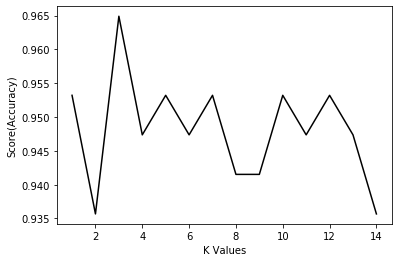

In [17]:
#Find Optimum K value
scores = []
for each in range(1,15):
    KNNfind = KNeighborsClassifier(n_neighbors = each)
    KNNfind.fit(X_train,y_train)
    scores.append(KNNfind.score(X_test,y_test))
    
plt.plot(range(1,15),scores,color="black")
plt.xlabel("K Values")
plt.ylabel("Score(Accuracy)")
plt.show()